In [1]:
!pip install textblob wordcloud seaborn plotly cufflinks --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from google.colab import files
import os

# Settings
%matplotlib inline
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Simulate sample dataset similar to 'text-query-tweets.json'
data = {
    'date': pd.date_range(start='2023-01-31', periods=10, freq='D'),
    'renderedContent': [
        "Budget 2023 looks promising!",
        "The new tax rules are confusing...",
        "Modi's plan seems visionary for 2023.",
        "Healthcare sector got less attention.",
        "Excited about the digital India investments.",
        "Union budget fails to support the poor.",
        "Strong support for infrastructure.",
        "No major announcement for education.",
        "Budget 2023 is balanced and futuristic.",
        "I feel neutral about the budget overall."
    ],
    'likeCount': [10, 5, 23, 2, 18, 1, 17, 0, 25, 0]
}
df1 = pd.DataFrame(data)
df1.head()


,date,renderedContent,likeCount
0,2023-01-31,Budget 2023 looks promising!,10
1,2023-02-01,The new tax rules are confusing...,5
2,2023-02-02,Modi's plan seems visionary for 2023.,23
3,2023-02-03,Healthcare sector got less attention.,2
4,2023-02-04,Excited about the digital India investments.,18


In [3]:
# Clean text
punct = ['%', '/', ':', '\\', '&amp', '&', ';', '?']
def clean_text(text):
    for p in punct:
        text = text.replace(p, '')
    return text

df1['renderedContent'] = df1['renderedContent'].astype(str).apply(clean_text)

# Sentiment analysis
def get_subjectivity(text): return TextBlob(text).sentiment.subjectivity
def get_polarity(text): return TextBlob(text).sentiment.polarity
def get_sentiment(score, threshold=0.05):
    if score >= threshold:
        return 'Positive'
    elif score <= -threshold:
        return 'Negative'
    else:
        return 'Neutral'

df1['subjectivity'] = df1['renderedContent'].apply(get_subjectivity)
df1['polarity'] = df1['renderedContent'].apply(get_polarity)
df1['textblob_sentiment'] = df1['polarity'].apply(get_sentiment)

# Save to CSV
df1.to_csv("cleaned_tweet_data.csv", index=False)
files.download("cleaned_tweet_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-4-88b13d10964f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_sentiment', data=df1, palette='pastel')


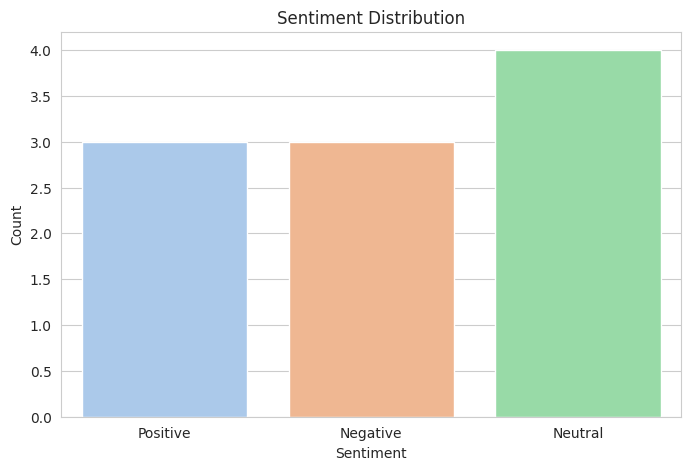

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='textblob_sentiment', data=df1, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("sentiment_distribution.png")
plt.show()

files.download("sentiment_distribution.png")


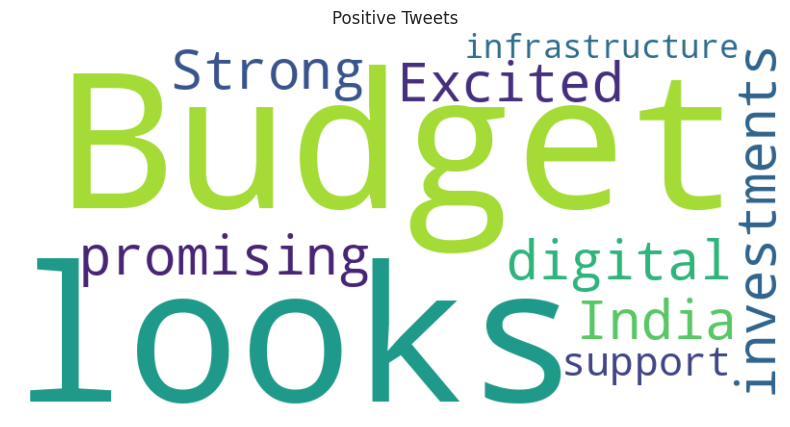

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

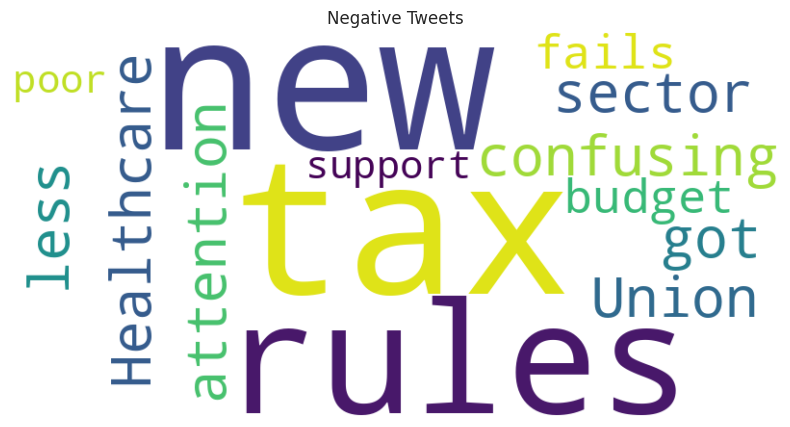

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

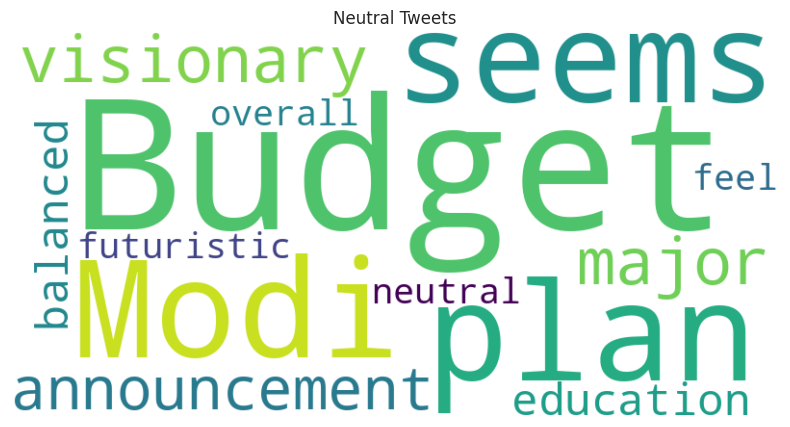

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
def generate_wordcloud(text_series, filename, title):
    text = " ".join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig(filename)
    plt.show()
    files.download(filename)

generate_wordcloud(df1[df1['textblob_sentiment'] == 'Positive']['renderedContent'], "positive_cloud.png", "Positive Tweets")
generate_wordcloud(df1[df1['textblob_sentiment'] == 'Negative']['renderedContent'], "negative_cloud.png", "Negative Tweets")
generate_wordcloud(df1[df1['textblob_sentiment'] == 'Neutral']['renderedContent'], "neutral_cloud.png", "Neutral Tweets")


<ipython-input-6-799ce371f473>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='mako')


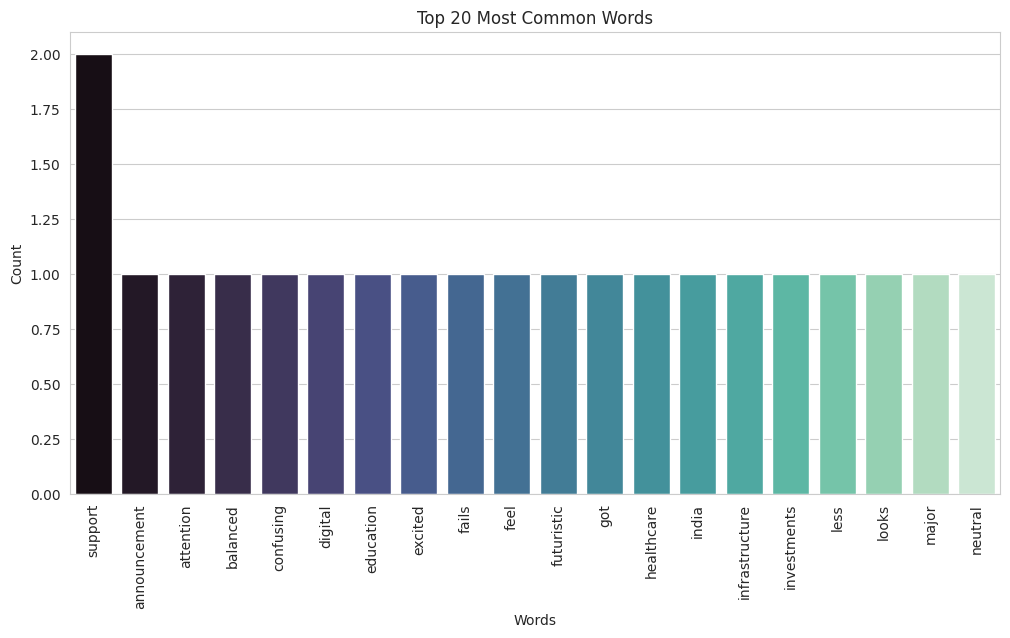

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
stop = stopwords.words('english') + ['budget', '2023', 'modi', 'union']
vectorizer = CountVectorizer(stop_words=stop)
count_data = vectorizer.fit_transform(df1['renderedContent'])

def plot_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = list(zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[:20]
    words, counts = zip(*count_dict)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette='mako')
    plt.xticks(rotation=90)
    plt.title("Top 20 Most Common Words")
    plt.ylabel("Count")
    plt.xlabel("Words")
    plt.savefig("common_words.png")
    plt.show()

    files.download("common_words.png")

plot_common_words(count_data, vectorizer)
